### Jake JJ Rickord
### 2022-1-21
### ADS Project 2

CryptoCurrency Price Predictions

Let's begin by importing our necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Now let's open up our dataset and take a look at it:

In [2]:
df = pd.read_csv(r'C:\Users\Jake\Desktop\Bellevue Items\Assignments\Applied Data Science\Project 2\data\All_combined.csv')
df

,Currency_Name,Date,Price,Open,High,Low,Vol.,Change %
0,Aave,2018-01-30,0.15000,0.17000,0.17000,0.14000,530470.0,-7.95
1,Aave,2018-01-31,0.14000,0.15000,0.15000,0.13000,396050.0,-11.10
2,Aave,2018-02-01,0.11000,0.14000,0.14000,0.11000,987260.0,-17.46
3,Aave,2018-02-02,0.10000,0.11000,0.11000,0.08000,1810000.0,-8.32
4,Aave,2018-02-03,0.11000,0.10000,0.12000,0.09000,1200000.0,6.85
...,...,...,...,...,...,...,...,...
53830,XPR,2015-01-26,0.01469,0.01700,0.01750,0.01469,0.0,-13.59
53831,XPR,2015-01-25,0.01700,0.01739,0.01739,0.01560,0.0,-2.24
53832,XPR,2015-01-24,0.01739,0.01600,0.01739,0.01500,0.0,8.69
53833,XPR,2015-01-23,0.01600,0.01602,0.01700,0.01600,0.0,-0.12


Now let's check for all the different currency names we'll be using with estimates

In [3]:
print(set(df['Currency_Name'].tolist()))

{'Dai', 'Litecoin', 'Tezos', 'Polygon', 'SHIBA_INU', 'Avalanche', 'GRT', 'WBTC', 'Kusama', 'FTX_Token', 'PancakeSwap', 'Tron', 'Dash', 'Bitcoin', 'Binance_Coin', 'Cosmos', 'Stellar', 'Bitcoin_BEP2', 'Uniswap', 'Neo', 'Waves', 'Binance_USD', 'Aave', 'Bitcoin_Cash', 'IOTA', 'Filecoin', 'Chainlink', 'Solana', 'Tether', 'Dogecoin', 'Algorand', 'Maker', 'EOS', 'Axie_Infinity', 'Monero', 'Polkadot', 'Bitcoin_SV', 'VeChain', 'Cardano', 'Crypto.com_Coin', 'XPR', 'Ethereum', 'Klaytn', 'Ethereum_Classic', 'THETA', 'Elrond', 'BitTorrent', 'LEO', 'ICP', 'USD_Coin'}


Which is made up of how many unique cryptocurrencies?

In [4]:
print(len(set(df['Currency_Name'].tolist())))

50


Perfect. We know that our dataset should be made up of the top 50 cryptos per source: https://www.kaggle.com/odins0n/top-50-cryptocurrency-historical-prices

Let's make sure all our columns are formatted correctly.

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53835 entries, 0 to 53834
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Currency_Name  53835 non-null  object 
 1   Date           53835 non-null  object 
 2   Price          53835 non-null  float64
 3   Open           53835 non-null  float64
 4   High           53835 non-null  float64
 5   Low            53835 non-null  float64
 6   Vol.           53835 non-null  float64
 7   Change %       53835 non-null  float64
dtypes: float64(6), object(2)
memory usage: 3.3+ MB
None


Looking good there, all our variables are described as floats that we'll be leveraging. Let's ensure (though we can infer from above printout) that all are filled in

In [6]:
print(df.isnull().values.any())

False


Looking good there as well. Dataset looks to be in pretty good shape for analysis, however looking once more at our dataframe, there's no closing value, just an open, high, and a low for pricing. Let's take another look.

In [7]:
df.head()

,Currency_Name,Date,Price,Open,High,Low,Vol.,Change %
0,Aave,2018-01-30,0.15,0.17,0.17,0.14,530470.0,-7.95
1,Aave,2018-01-31,0.14,0.15,0.15,0.13,396050.0,-11.10
2,Aave,2018-02-01,0.11,0.14,0.14,0.11,987260.0,-17.46
3,Aave,2018-02-02,0.10,0.11,0.11,0.08,1810000.0,-8.32
4,Aave,2018-02-03,0.11,0.10,0.12,0.09,1200000.0,6.85


Examining further, we can see that going into the following day, the "Price" column looks to be the new opening value. Thus, Price must really be a codename for the closing value. To reduce confusion, let's rename and reorder those columns.

In [8]:
df = df.rename(columns = {'Price' : 'Close'})
df = df[['Currency_Name', 'Date', 'Open', 'High', 'Low', 'Close', 'Vol.', 'Change %']]
df.head()

,Currency_Name,Date,Open,High,Low,Close,Vol.,Change %
0,Aave,2018-01-30,0.17,0.17,0.14,0.15,530470.0,-7.95
1,Aave,2018-01-31,0.15,0.15,0.13,0.14,396050.0,-11.10
2,Aave,2018-02-01,0.14,0.14,0.11,0.11,987260.0,-17.46
3,Aave,2018-02-02,0.11,0.11,0.08,0.10,1810000.0,-8.32
4,Aave,2018-02-03,0.10,0.12,0.09,0.11,1200000.0,6.85


Much better. Now, let's take a look at the distributions for these 50 cryptos.

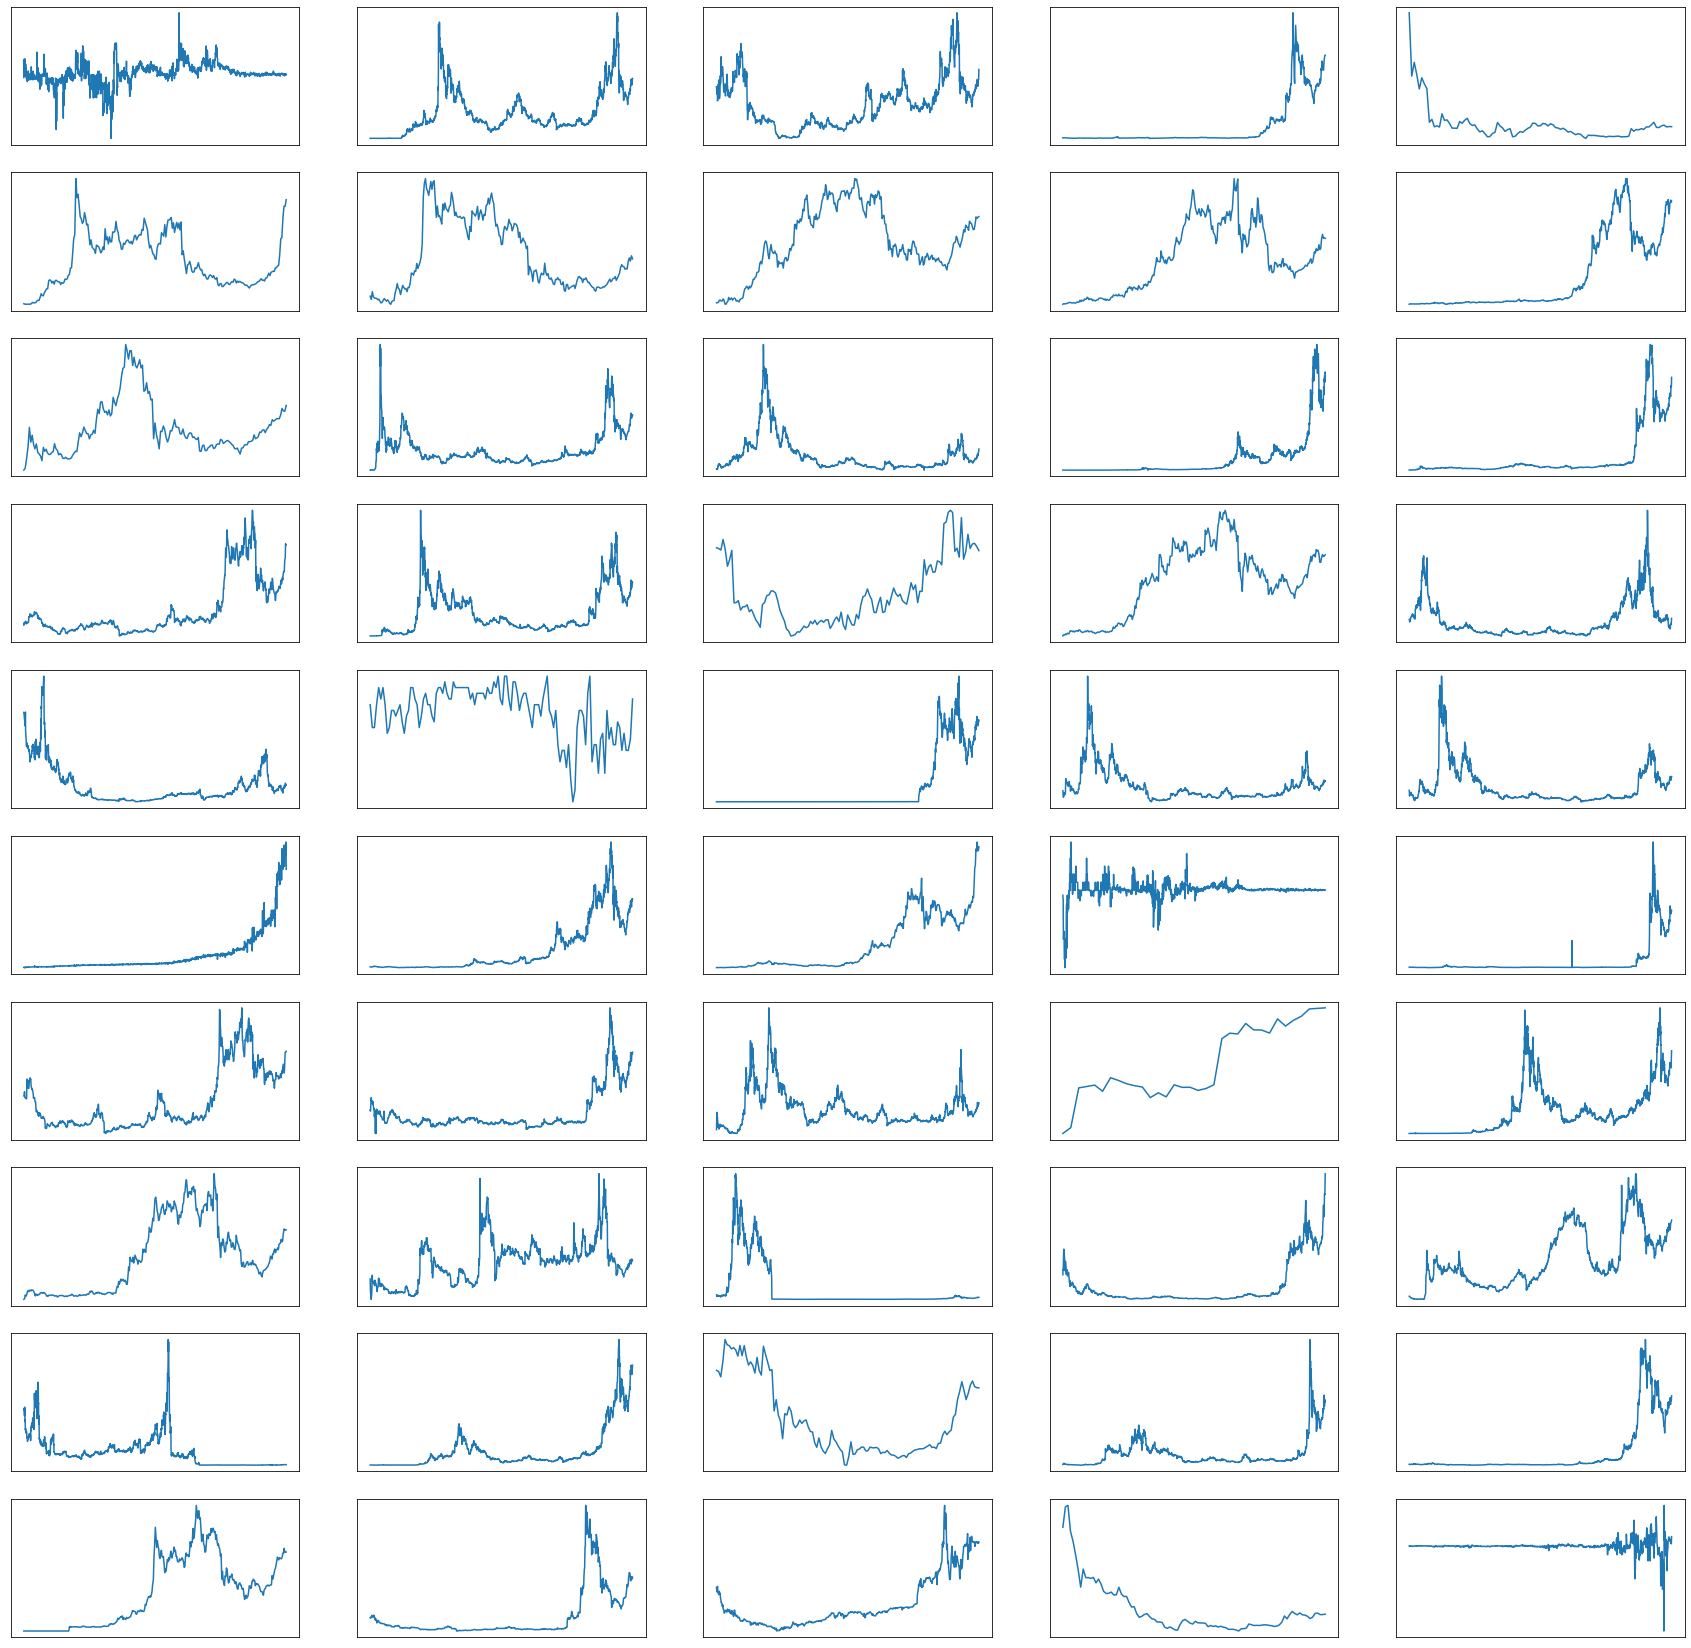

In [10]:
plt.rcParams['figure.figsize'] = [30, 30]
fig, ax = plt.subplots(10, 5)
x, y = 0, 0
for name in set(df['Currency_Name'].tolist()):
    ndf = df.loc[df['Currency_Name']==name]
    ax[x,y].plot(ndf.Date, ndf.Open)
    ax[x,y].set_xticks([])
    ax[x,y].set_yticks([])
    if(y<4):
        y=y+1
    else:
        x=x+1
        y=0

Some high variances in chart visuals, however there are quite a few that have spiked in recent years which makes sense given the crypto craze over the past 5 years. Let's get into the modeling now and see if we can't work something up to predict those trends. We're going to work off of something akin to n-grams to test many (not all) different possibilities of combinations of coin data to use to attempt to accurately predict each coin data (accuracy will have to be weighted based on how well it maps against a newer vs an older coin).

For starters, let's split our data into training and test data. This is a bit tricky here, if we want to be able to check how our model performs against crypto as a genre, we'll need to have test and training data for each coin type

In [89]:
#libaries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statistics

In [71]:
#test train split

#identify feature vs dependent variable columns
ivs = ['Open', 'High', 'Low', 'Vol.']
dv = 'Close'

#establish main masters for each test and training sets
x_train_master = pd.DataFrame(columns = ['Open', 'High', 'Low', 'Vol.', 'Currency_Name'])
x_test_master = pd.DataFrame(columns = ['Open', 'High', 'Low', 'Vol.', 'Currency_Name'])
y_train_master = pd.DataFrame(columns = ['Close', 'Currency_Name'])
y_test_master = pd.DataFrame(columns = ['Close', 'Currency_Name'])

#for each coin, split it into training and test sets, append accordingly to masters
for coin in set(df['Currency_Name'].tolist()):
    dfoi = df.loc[df['Currency_Name']==coin]
    X_train, X_test, y_train, y_test = train_test_split(dfoi[ivs], dfoi[dv], test_size=0.20)
    X_train['Currency_Name'] = coin
    x_train_master = x_train_master.append(X_train, ignore_index = True)
    X_test['Currency_Name'] = coin
    x_test_master = x_test_master.append(X_test, ignore_index = True)
    ndf = pd.DataFrame(columns=['Close', 'Currency_Name'])
    ndf['Close'] = y_train
    ndf['Currency_Name'] = coin
    y_train_master = y_train_master.append(ndf, ignore_index = True)
    ndf = pd.DataFrame(columns=['Close', 'Currency_Name'])
    ndf['Close'] = y_test
    ndf['Currency_Name'] = coin
    y_test_master = y_test_master.append(ndf, ignore_index = True)

Alright, now to implement that n-gram adjacent modeling technique

In [94]:
#quick measure to identify best accuracy
blmr = ''
b_a = 0.0


#for each n-combinations of cryptos included
for n_combos in range(1,len(set(df['Currency_Name'].tolist()))+1):
    #start iterator for progressing over all coins
    i=0
    #while in bounds of the number of coins
    while(i+n_combos<len(set(df['Currency_Name'].tolist()))):
        #reset coinname list
        cl = []
        #grab the first coin's train info
        cxdf = pd.DataFrame(columns = ['Open', 'High', 'Low', 'Vol.', 'Currency_Name'])
        cydf = pd.DataFrame(columns = ['Close', 'Currency_Name'])
        #cxdf = x_train_master.loc[x_train_master['Currency_Name']]==list(set(df['Currency_Name'].tolist()))[i]
        #then iterate to grab each following coin in n_combos data
        for cnum in range(i+n_combos):
            #add each coin name that model will be pulling data from
            cl.append(list(set(df['Currency_Name'].tolist()))[cnum])
            cxdf = cxdf.append(x_train_master.loc[x_train_master['Currency_Name']==list(set(df['Currency_Name'].tolist()))[cnum]], ignore_index = True)
            cydf = cydf.append(y_train_master.loc[y_train_master['Currency_Name']==list(set(df['Currency_Name'].tolist()))[cnum]], ignore_index = True)
        #now we have our xtrain and ytrain datasets. Time to train our model. But first let's drop the currency name from each
        cxdf = cxdf.drop(['Currency_Name'], axis=1)
        cydf = cydf.drop(['Currency_Name'], axis=1)

        #okay now we should be good to go!
        mlr = LinearRegression()
        mlr.fit(cxdf, cydf)
           
        r2l = []    
        #our model is built, now let's use it on each of our original test sets, and measure the accuracy of prediction evaluated and weighted by size
        for cc in range(len(set(df['Currency_Name'].tolist()))):
            x_test = x_test_master.loc[x_test_master['Currency_Name']==list(set(df['Currency_Name'].tolist()))[cc]]
            y_test = y_test_master.loc[y_test_master['Currency_Name']==list(set(df['Currency_Name'].tolist()))[cc]]
            x_test = x_test.drop('Currency_Name', axis=1)
            y_test = y_test.drop('Currency_Name', axis=1)
            y_test = y_test.to_numpy()
            y_pred = mlr.predict(x_test)
            weight = (len(x_test)/len(x_test_master))
            r2 = weight*r2_score(y_test, y_pred)
            if (abs(r2)<=1):
                r2l.append(weight*r2_score(y_test, y_pred))
            #if(r2_score(y_test, y_pred)>best_accuracy):
                #blmr = mlr
                #best_accuracy = r2_score(y_test, y_pred)
                #bcl = cl
        
        tot = sum(r2l)
        if tot > b_a:
            b_a = tot
            blmr = mlr
            bcl = cl
        
        #move starting point of first coin up
        i=i+1
        
print(blmr)
print(b_a)
print(bcl)

LinearRegression()
0.9065621714735138
['Dai', 'Litecoin', 'Tezos', 'Polygon', 'SHIBA_INU']


Looks like our highest rated weighted Rsquared score totaled up to a 0.90. Looks great, though it's likely pertinent we take an examination to see which cryptos it performs best on and which it doesn't.

In [98]:
from sklearn import metrics
coin_performance = {}
for c in range(len(set(df['Currency_Name'].tolist()))):
    x_test = x_test_master.loc[x_test_master['Currency_Name']==list(set(df['Currency_Name'].tolist()))[c]]
    y_test = y_test_master.loc[y_test_master['Currency_Name']==list(set(df['Currency_Name'].tolist()))[c]]
    y_test = y_test.drop('Currency_Name', axis=1)
    x_test = x_test.drop('Currency_Name', axis=1)
    y_test = y_test.to_numpy()
    y_pred = blmr.predict(x_test)
    rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    coin_performance[list(set(df['Currency_Name'].tolist()))[c]] = rootMeanSqErr
print(coin_performance)

{'Dai': 0.008289989606853664, 'Litecoin': 2.390043207016045, 'Tezos': 0.09564914135830346, 'Polygon': 0.023646111865993975, 'SHIBA_INU': 0.0031975814758335944, 'Avalanche': 1.322930831969088, 'GRT': 0.05471490518652531, 'WBTC': 695.2169602013031, 'Kusama': 9.483319353134299, 'FTX_Token': 0.5439990750633752, 'PancakeSwap': 0.6881087348313322, 'Tron': 0.004505242679618056, 'Dash': 7.4473244434468, 'Bitcoin': 267.03099872316693, 'Binance_Coin': 4.304917145980316, 'Cosmos': 0.35815544886523765, 'Stellar': 0.008593734908307688, 'Bitcoin_BEP2': 1294.3877852958126, 'Uniswap': 0.5925514890730734, 'Neo': 1.7349047089623897, 'Waves': 0.25845238055860087, 'Binance_USD': 0.0002828439162703157, 'Aave': 6.483523030585569, 'Bitcoin_Cash': 19.921114380877246, 'IOTA': 0.04727870308417676, 'Filecoin': 1.5648886770699364, 'Chainlink': 0.3995654493158923, 'Solana': 0.5146356856804573, 'Tether': 0.00509962998242495, 'Dogecoin': 0.009522626291225595, 'Algorand': 0.022887016866943808, 'Maker': 69.10834880818

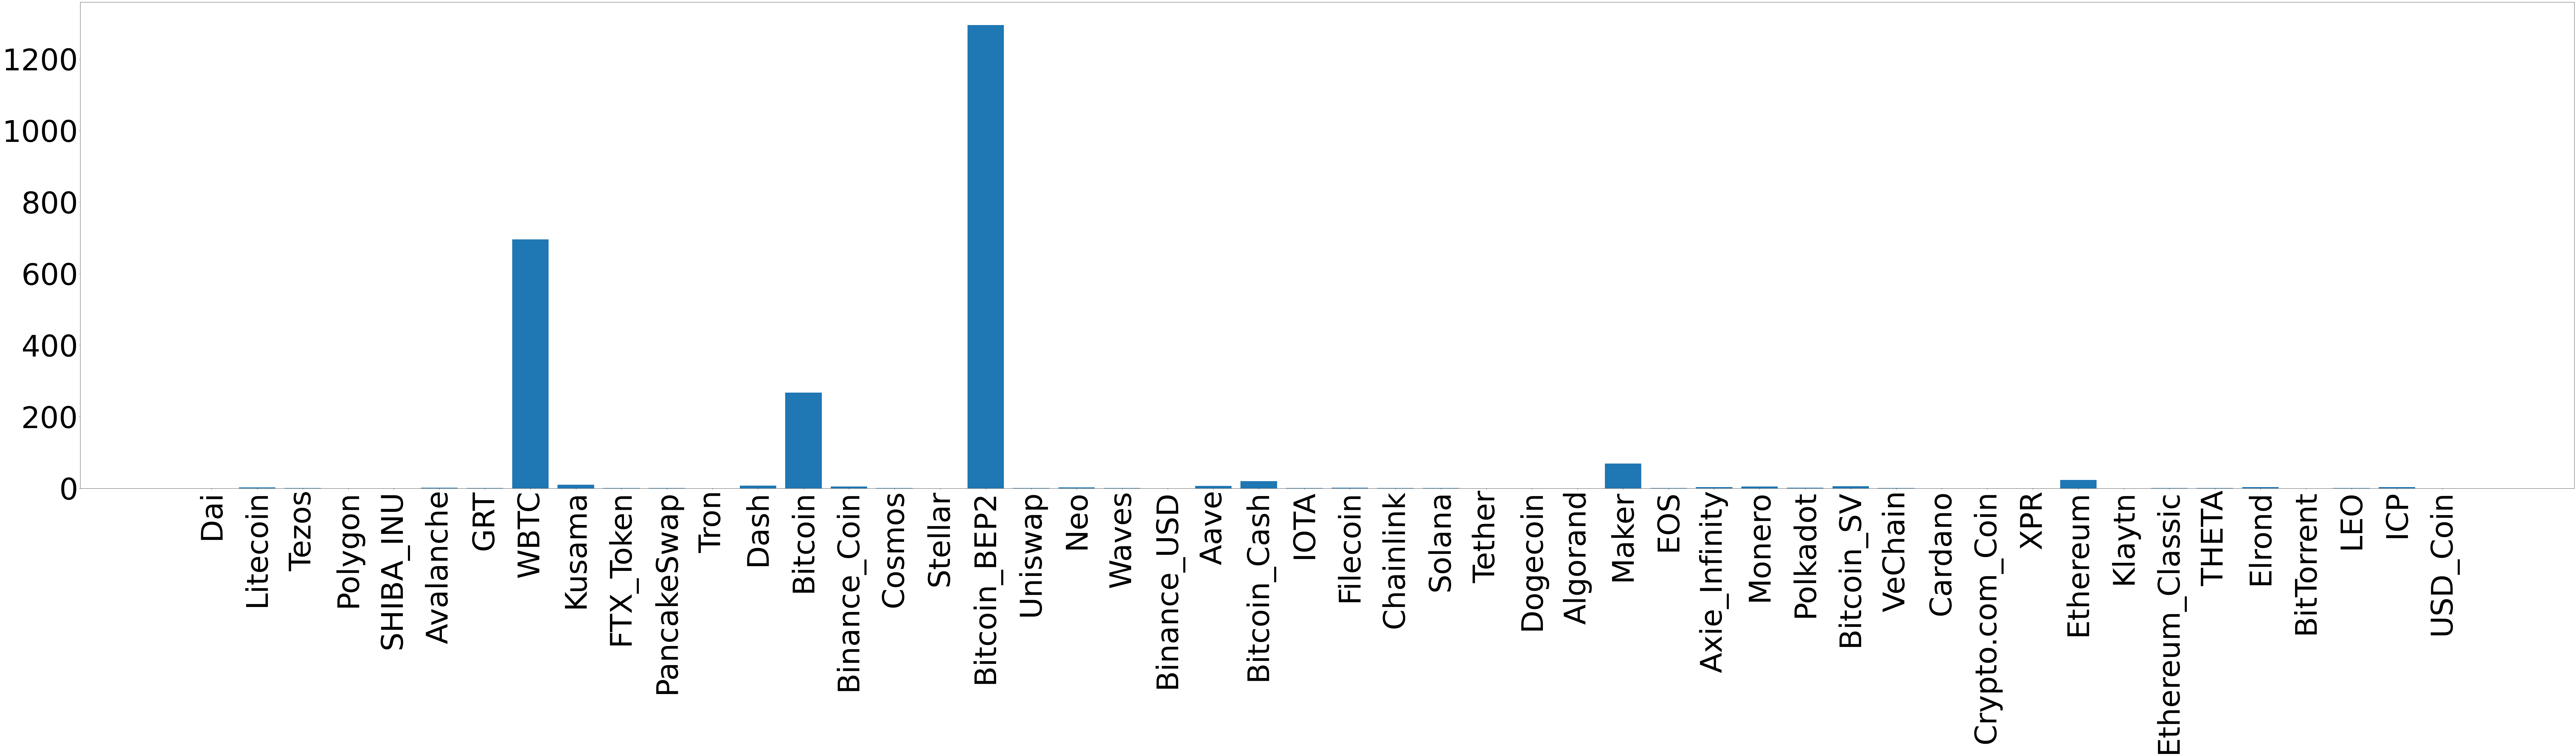

In [112]:
plt.rcParams['figure.figsize'] = [150, 30]
plt.bar(range(len(coin_performance)), list(coin_performance.values()), tick_label=list(coin_performance.keys()))
plt.xticks(rotation='vertical', fontsize=100)
plt.yticks(fontsize = 100)
plt.show()